<b>Exercise 1: </b>

Average humidity:    39.51%      
Average Temperature: 21.86C       
Max Temperature:     32.32C       
Minimum Temperature: 11.73C


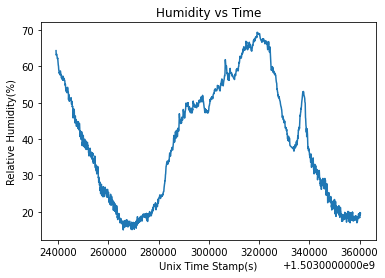

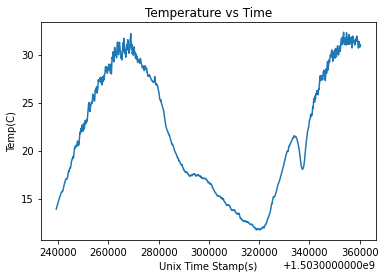

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Get weather data from file and store it in single array
timeTempHumid = np.genfromtxt("weather_data.txt", \
                              dtype=float,        \
                              encoding=None,      \
                              delimiter=",")

# Make plots
plt.plot(timeTempHumid[:, 0], timeTempHumid[:, 2])
plt.title("Humidity vs Time")
plt.ylabel("Relative Humidity(%)")
plt.xlabel("Unix Time Stamp(s)")
plt.savefig("humidity.png")

plt.figure()
plt.plot(timeTempHumid[:, 0], timeTempHumid[:, 1])
plt.title("Temperature vs Time")
plt.ylabel("Temp(C)")
plt.xlabel("Unix Time Stamp(s)")
plt.savefig("temp.png")

# Find and print averages and max/min temps
averageHum  = np.sum(timeTempHumid[:, 2]) / len(timeTempHumid[:, 2])
averageTemp = np.sum(timeTempHumid[:, 1]) / len(timeTempHumid[:, 1])
maxTemp     = np.max(timeTempHumid[:, 1])
minTemp     = np.min(timeTempHumid[:, 1])

print("Average humidity:    %0.2f%% \
     \nAverage Temperature: %0.2fC  \
     \nMax Temperature:     %0.2fC  \
     \nMinimum Temperature: %0.2fC" \
      %(averageHum, averageTemp, maxTemp, minTemp))

<b>Exercise 2: </b>
The second expression is a better suitied for small values of x. This can be seen clearly if we take the first few terms of the Taylor expansions of sin(x) and cos(x). 

$sin(x) \approx x - \frac{x^3}{6} $

$cos(x) \approx 1 - \frac{x^2}{2} $

sticking these into the expressions we get

$\frac{1 - cos(x)}{x^2} \approx \frac{(1 - (1 - \frac{x^2}{2})}{x^2}$

$2 (\frac{sin(x/2)}{x}) ^2 \approx 2 (\frac{x/2 - \frac{x^3}{48}}{x}) ^2 = 2(\frac{1}{2} - \frac{x^2}{48})^2 $

In the expression involving cosine, the first opperation that happens is the subtraction of two almost equal numbers (1 - (1 - 10^-2n/2)), which often leads to numerical instability. In fact, if we approximate 1 - 10^-16 / 2 as 1, the output of the first expression would be: 

$\frac{(1 - 1)}{10^-16}=\frac{0}{10^-16}=0$

Which is what we get in the code below. 

In [20]:
from numpy import cos, sin

def function1(x):
	return (1 - cos(x))/(x ** 2)

def function2(x):
	return 2 *  ( (sin( x / 2) / x) ** 2)

print("For x = 10^-5")
print("Function 1 output: %0.18f, \
     \nFunction 2 output: %0.18f" \
      % ( function1(10 ** -5), function2(10 ** -5)))

print("\nFor x = 10^-8")
print("Function 1 output: %0.18f, \
     \nFunction 2 output: %0.18f" \
      % ( function1(10 ** -8), function2(10 ** -8)))




For x = 10^-5
Function 1 output: 0.500000041370185389,      
Function 2 output: 0.499999999995833222

For x = 10^-8
Function 1 output: 0.000000000000000000,      
Function 2 output: 0.500000000000000000
